Average Hypothesis g(x): y = -0.002059x + -0.002882
Bias: 0.2101
Variance: 0.3399
Out-of-Sample Error (E_out): 0.5500


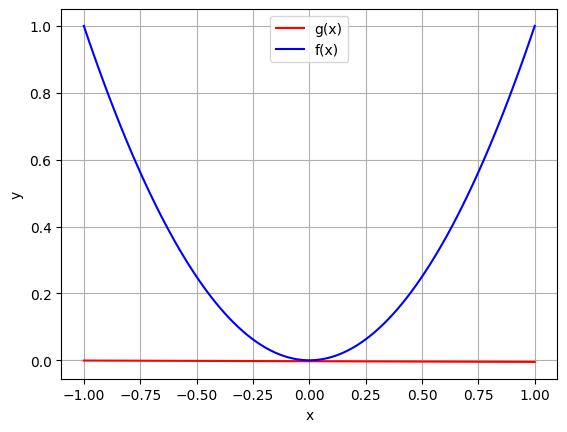

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import random

def run_iteration():
        pt1 = random.uniform(-1, 1)
        pt2 = random.uniform(-1, 1)
        
        while pt1 == pt2:
            pt2 = random.uniform(-1, 1)

        m = (pt2 ** 2 - pt1 ** 2) / (pt2 - pt1)
        b = pt1 ** 2 - m * pt1
        return (m, b)

def calculate_average_g(g):
     avg_m = np.mean([m for m, _ in g])
     avg_b = np.mean([b for _, b in g])

     return (avg_m, avg_b)

def calculate_variance(g, g_avg):
    avg_m, avg_b = g_avg
    x_values = np.linspace(-1, 1, 100)
    variance = 0
    
    for m, b in g:
        predicted_values = m * x_values + b
        avg_predicted_values = avg_m * x_values + avg_b
        variance += np.mean((predicted_values - avg_predicted_values) ** 2)
    
    variance /= len(g)
    return variance

def calculate_bias(g_avg):
    avg_m, avg_b = g_avg
    x_values = np.linspace(-1, 1, 100)
    true_values = x_values ** 2
    predicted_values = avg_m * x_values + avg_b
    bias = np.mean((predicted_values - true_values) ** 2)
    return bias

def calculate_e_out(g):
    x_values = np.linspace(-1, 1, 100)
    true_values = x_values ** 2
    e_out = 0
    
    for m, b in g:
        predicted_values = m * x_values + b
        e_out += np.mean((predicted_values - true_values) ** 2)
    
    e_out /= len(g)
    return e_out

if __name__ == '__main__':
    
    iterations = 10000
    g = [] * 10000
    for _ in range(iterations):
        g.append(run_iteration())


    g_avg = calculate_average_g(g)
    bias = calculate_bias(g_avg)
    variance = calculate_variance(g, g_avg)
    e_out = calculate_e_out(g)
    
    
    print(f"Average Hypothesis g(x): y = {g_avg[0]:f}x + {g_avg[1]:f}")
    print(f"Bias: {bias:.4f}")
    print(f"Variance: {variance:.4f}")
    print(f"Out-of-Sample Error (E_out): {e_out:.4f}")

    x_values = np.linspace(-1, 1, 100)
    y_values = g_avg[0] * x_values + g_avg[1]

    plt.plot(x_values, y_values, label=f'g(x)', color='red')
    plt.plot(x_values, x_values ** 2, label='f(x)', color='blue')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.grid(True)
    plt.show()